<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Lab: Titanic EDA

---
For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Read the titanic data (in the form of the `train.csv` in this repo using the appropriate Pandas method).

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
train = pd.read_csv('train.csv')
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data Dictionary

| Variable | Description | Details |
|----------|-------------|---------|
| survival | Survival | 0 = No; 1 = Yes |
| pclass | Passenger Class | 1 = 1st; 2 = 2nd; 3 = 3rd |
| name | First and Last Name | |
| sex | Sex | |
| age | Age | |
| sibsp | Number of Siblings/Spouses Aboard | |
| parch | Number of Parents/Children Aboard | |
| ticket | Ticket Number | |
| fare | Passenger Fare | |
| cabin | Cabin | |
| embarked | Port of Embarkation | C = Cherbourg; Q = Queenstown; S = Southampton |

## Step 2: Cleaning the data
####  1. Create a bar chart showing how many missing values are in each column

In [413]:
null_list = (train.isnull().sum()).reset_index() 
null_list.columns = ['column', 'total_null'] 
null_list = null_list[null_list['total_null']>0]

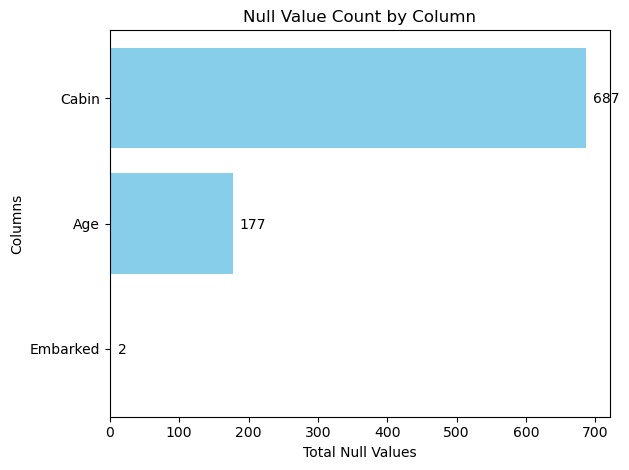

In [414]:
null_list = null_list.sort_values(by='total_null', ascending=True)

plt.barh(y=null_list['column'], width=null_list['total_null'], color='skyblue')

for index, value in enumerate(null_list['total_null']):
    plt.text(value + 10, index - .04 , str(value))  

plt.xlabel('Total Null Values')
plt.ylabel('Columns')
plt.title('Null Value Count by Column')
plt.tight_layout()
plt.show()


####  2. Which column has the most `NaN` values? How many cells in that column are empty?


In [416]:
null_list.tail(1)

,column,total_null
10,Cabin,687


####  3. Delete all rows where `Embarked` is empty

In [418]:
train = train[train['Embarked'].notnull()]
train['Embarked'].isnull().sum()

0

#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [420]:
train['Cabin'] = train['Cabin'].fillna('¯\\_(ツ)_/¯')
train['Cabin'].isnull().sum()

0

## Step 3: Feature extraction

#### 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [423]:
train['FamilyCount'] = train['SibSp'] + train['Parch']

#### 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.


In [425]:
train['IsReverend'] = train['Name'].apply(lambda x: 1 if 'Rev.' in x else 0)

In [426]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0


#### 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`.

  - Familiarize yourself with the [**`pd.get_dummies` documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS (required): Extract the title from everyone's name and create dummy columns

In [428]:
Embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked')

In [429]:
Sex_dummies = pd.get_dummies(train['Sex'], prefix='Sex')

## Step 4: Exploratory analysis

_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#### 1. What was the survival rate overall?


In [433]:
train_survived = train[train['Survived'] == 1]

In [434]:
total = train.shape[0]
train_survived.shape[0]/total* 100

38.24521934758155

In [435]:
train_grouped = (train.groupby(by = 'Survived')['Survived'].count()/total*100).reset_index(name = 'Survived Rate')
train_grouped

,Survived,Survived Rate
0,0,61.754781
1,1,38.245219


#### 2. Which gender fared the worst? What was their survival rate?

In [437]:
sex_grouped = (train_survived.groupby(by = ['Sex'])['Survived'].count()/total*100).reset_index(name = 'Survived Rate')
sex_grouped
male_rate = sex_grouped['Survived Rate'][sex_grouped['Sex'] == 'male'].values
female_rate = sex_grouped['Survived Rate'][sex_grouped['Sex'] == 'female'].values

male_rate = float(male_rate)
female_rate = float(female_rate)

print(f'Survival rate for male :{male_rate:.2f}%')
print(f'Survival rate for female :{female_rate:.2f}%')

if male_rate > female_rate:
    print(f'Males have a higher survival rate than females by approximately {male_rate - female_rate:.2f}%')
else:
    print(f'Females have a higher survival rate than males by approximately {female_rate - male_rate:.2f}%')

Survival rate for male :12.26%
Survival rate for female :25.98%
Females have a higher survival rate than males by approximately 13.72%


C:\Users\user\AppData\Local\Temp\ipykernel_27428\3945490637.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  male_rate = float(male_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_27428\3945490637.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  female_rate = float(female_rate)


#### 3. What was the survival rate for each `Pclass`?

In [439]:
Pclass_grouped = (train_survived.groupby(by = ['Pclass'])['Survived'].count()/total*100).reset_index(name = 'Survived Rate')
Pclass_grouped

,Pclass,Survived Rate
0,1,15.073116
1,2,9.786277
2,3,13.385827


#### 4. Did any reverends survive? How many?`

In [441]:
reverends_survived = train.groupby(by = ['IsReverend','Survived']).count().reset_index()
reverends_survived = reverends_survived[(reverends_survived['IsReverend'] == 1) & (reverends_survived['Survived'] == 1)]
number_of_reverends_survived = reverends_survived['IsReverend'].count()/total*100
if number_of_reverends_survived == 0:
    print("No reverends survived.")
else:
    print(f'{number_of_reverends_survived} reverend(s) survived.')

No reverends survived.


#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [443]:
cabins_survived = train.groupby(by = ['Cabin','Survived']).count().reset_index()
cabins_survived = cabins_survived[(cabins_survived['Cabin'] == '¯\\_(ツ)_/¯') & (cabins_survived['Survived'] == 1)]
cabins_survived['Cabin'].count()/total*100

0.11248593925759282

#### 6. What is the survival rate for people whose `Age` is empty?

In [445]:
EmptyAge_survived = train[(train['Age'].isnull())& (train['Survived'] == 1)]
EmptyAge_survived['Survived'].count()/total*100

5.849268841394826

####  7. What is the survival rate for each port of embarkation?

In [447]:
Pclass_grouped = (train_survived.groupby(by = ['Embarked'])['Survived'].count()/total*100).reset_index(name = 'Survived Rate')
Pclass_grouped

,Embarked,Survived Rate
0,C,10.461192
1,Q,3.374578
2,S,24.409449


#### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [449]:
train_survived_under12 = train_survived[train_survived['Age']<=12]
Pclass_grouped_under12 = (train_survived_under12.groupby(by = ['Pclass'])['Survived'].count()/total*100).reset_index(name = 'Survived Rate')
Pclass_grouped_under12

,Pclass,Survived Rate
0,1,0.337458
1,2,1.912261
2,3,2.249719


####  9. Did the captain of the ship survive? Is he on the list?

In [451]:
captain = train_survived[train_survived['Name'].str.contains('Cap')]
"No, he is not on the list" if captain.empty else "Yes, he is not on the list"

'No, he is not on the list'

#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [453]:
train_died = train[train['Survived'] ==0 ]
train_died_most_exp = train['Fare'].max()
print(f'The most expensive ticket for non-survivors was {train_died_most_exp:.2f}.')

The most expensive ticket for non-survivors was 512.33.


#### 11. Does having family on the boat help or hurt your chances of survival?

In [455]:
Survived_with_family = train[train['Survived'] ==1]
Survived_with_family_Rate = (Survived_with_family.groupby(by = ['FamilyCount','Survived'])['Survived'].count()/total*100).reset_index(name = 'Percentage')
Survived_with_family_Rate

,FamilyCount,Survived,Percentage
0,0,1,18.110236
1,1,1,10.011249
2,2,1,6.636670
3,3,1,2.362205
4,4,1,0.337458
5,5,1,0.337458
6,6,1,0.449944


In [456]:
print(f'Having a family decreases the chance of survival.')

Having a family decreases the chance of survival.


## Step 5: Plotting
Using Matplotlib and Seaborn, create multiple charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


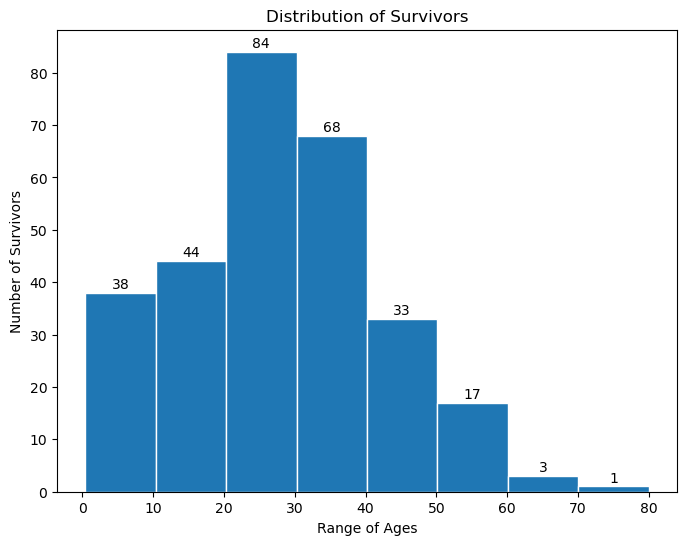

In [458]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(x='Age', data=train_survived, bins=8, edgecolor='white')

ax.set_title('Distribution of Survivors')
ax.set_xlabel('Range of Ages')
ax.set_ylabel('Number of Survivors')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=1)
    
plt.show()


In [459]:
train_survived = train[train['Survived'] == 1]
train_survived['Having_Family'] = np.where(train_survived['FamilyCount']== 0,0,1)

C:\Users\user\AppData\Local\Temp\ipykernel_27428\2976595433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_survived['Having_Family'] = np.where(train_survived['FamilyCount']== 0,0,1)


In [460]:
class_family_grouped = train_survived.groupby(['Pclass', 'Having_Family'])['Survived'].sum().unstack()
class_family_grouped

Having_Family,0,1
Pclass,,
1,56,78
2,36,51
3,69,50


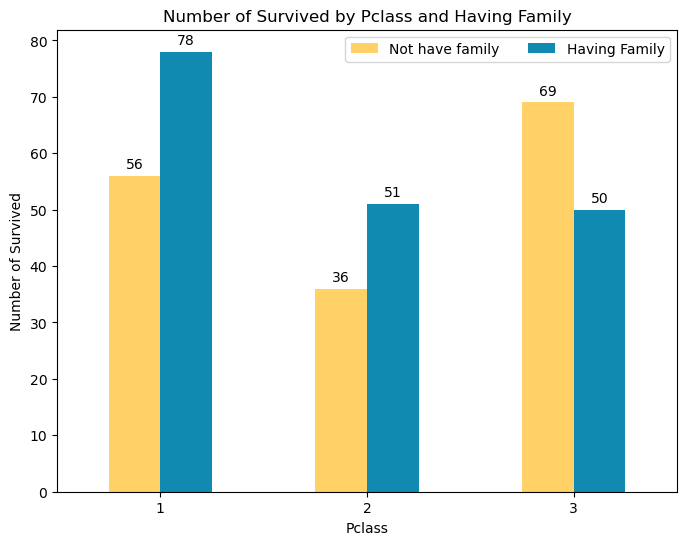

In [461]:
# Creating the subplot bar chart
fig, ax = plt.subplots(figsize=(8, 6))
color = ['#ffd166','#118ab2']
# Plotting
class_family_grouped.plot(kind='bar', ax=ax, color = color)

# Customizing the plot
ax.set_title('Number of Survived by Pclass and Having Family')
ax.set_xlabel('Pclass')
ax.set_ylabel('Number of Survived')
ax.legend(['Not have family', 'Having Family'],
         loc='upper right', ncols=3)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
    
plt.xticks(rotation=0)
plt.show()

In [462]:
Sex_Age_grouped = train_survived.groupby(['Age', 'Sex'])['Survived'].count().reset_index()
Sex_Age_grouped


,Age,Sex,Survived
0,0.42,male,1
1,0.67,male,1
2,0.75,female,2
3,0.83,male,2
4,0.92,male,1
...,...,...,...
98,60.00,female,1
99,60.00,male,1
100,62.00,male,1
101,63.00,female,2


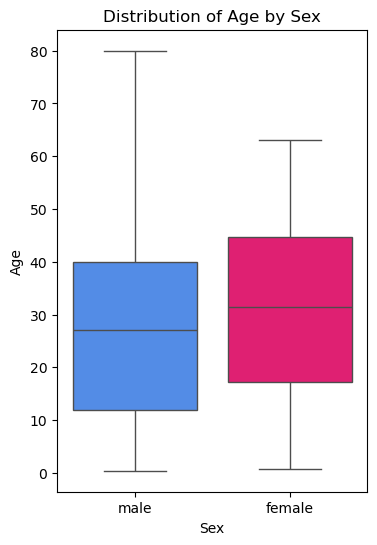

In [463]:
fig, ax = plt.subplots(figsize=(4, 6))


sns.boxplot(x='Sex', y='Age', data=Sex_Age_grouped, ax=ax, hue = 'Sex', palette=['#3a86ff', '#ff006e'])

# Customizing the plot
ax.set_title('Distribution of Age by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Age')

# Display the plot
plt.show()